<a href="https://colab.research.google.com/github/Bhargava-hs/ML/blob/main/Tutorial%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

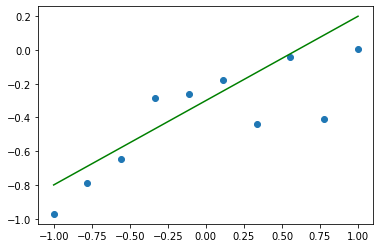

In [1]:
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import numpy as np
import seaborn as sns
import random 


x=np.linspace(-1,1,10)
def incoming_dataset():
    y=0.5*x-0.3
    t=y+np.random.normal(0,0.2,10)
    return t
sample_pts=incoming_dataset()
plt.scatter(x, sample_pts)
plt.plot(x, 0.5 * x-0.3, c="green")

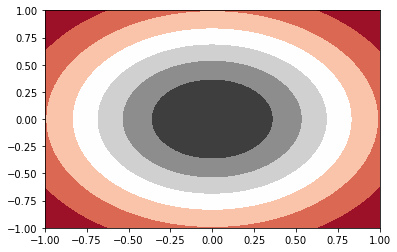

In [2]:
def line(x, w0, w1):
    return w0 + w1*x
    
def probability(y, x, w0, w1):
    k = math.sqrt(np.pi * 2) * 0.2
    p=k * np.exp(-0.5 * ((y - line(x, w0, w1))/0.2) ** 2)
    return p;

w0, w1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
grid_w0 = norm.pdf(w0, 0, math.sqrt(0.5))
grid_w1 = norm.pdf(w1, 0, math.sqrt(0.5))
prior_grid = grid_w0 * grid_w1
plt.contourf(w0, w1, prior_grid, cmap="RdGy")

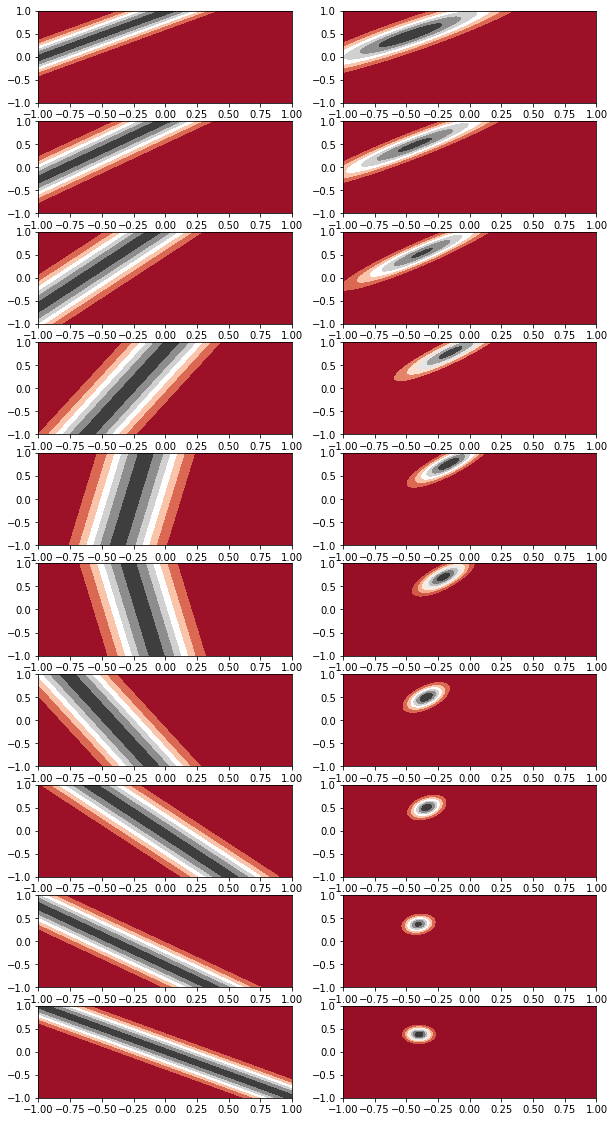

In [3]:
fig, axes =plt.subplots(10, 2, figsize=(10, 20))
count = 0
for i, j in zip(x, sample_pts):
    likelihood = probability(j, i, w0, w1)
    posterior = prior_grid * likelihood
    prior_grid = posterior
    axes[count, 0].contourf(w0, w1, likelihood, cmap="RdGy")
    axes[count, 1].contourf(w0, w1, posterior, cmap="RdGy")
    count = count+1

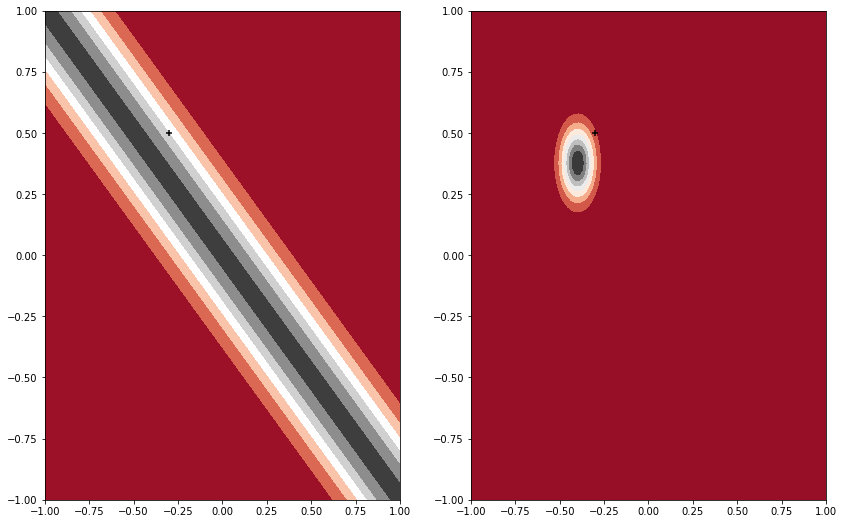

In [4]:
fig1, axes1 = plt.subplots(1, 2, figsize=(14, 9))
axes1[0].contourf(w0, w1, likelihood, cmap="RdGy")
axes1[0].scatter(-0.3, 0.5, c="black", marker="+")
axes1[1].contourf(w0, w1, posterior, cmap="RdGy")
axes1[1].scatter(-0.3, 0.5, c="black", marker="+")